# Green AI project : Water polution

## I - Importations

In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import warnings

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score, cross_val_predict

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings("ignore")

## II - Adding the dataset

### a - Adding the datasets

In [120]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
target = pd.read_csv("Target.csv")
submission = pd.read_csv("Submission.csv")

### b - Concatenate the datasets 

In [121]:
df = pd.concat([train, test])
targets = pd.concat([target, submission])

df['polution'] = targets['polution_clf']
df = df.drop(columns = ['Unnamed: 0'])
df = df.drop(columns= ['period'])
df.head()

df_copy = df


## III -  Data cleaning

### a - Informations about the dataset

Shape of the dataframe

In [122]:
print("DataFrame shape : ",df.shape)

DataFrame shape :  (3660, 17)


Printing the columns

In [123]:
print(df.columns)

Index(['code', 'year', 'id', 'Country', 'tourists', 'venue', 'rate', 'food',
       'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste',
       'waste_recycling', 'polution'],
      dtype='object')


Description of the dataset

In [124]:
df.describe()

,year,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
count,3660.000000,3.660000e+03,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,2008.656831,5.569954e+07,0.090984,11.070253,31.853109,8.529104,3.086691,24.146068,19.697694,10.506295,0.094820,0.833948,23.062085,0.404098
std,0.937363,2.304268e+07,0.561277,28.400648,8.886749,2.974285,0.883262,6.262395,4.261491,4.215245,0.582198,2.556819,4.803606,0.490784
min,2005.000000,5.300380e+05,0.000000,0.000000,14.180000,2.200000,1.380000,0.000000,6.100000,1.450000,0.000000,0.000000,0.760000,0.000000
25%,2008.000000,5.094169e+07,0.000000,0.000000,32.000000,8.000000,3.000000,26.000000,18.900000,9.000000,0.000000,0.000000,22.260000,0.000000
50%,2009.000000,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,0.000000
75%,2009.000000,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,1.000000
max,2017.000000,7.117635e+07,7.000000,87.158924,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,4.000000,19.180000,47.830000,1.000000


### b - Searching for missing values

Print the missing values per columns

In [125]:
def cheking_for_missing_values() : 
    missing_values = df.isnull().sum()
    print("\nTotal missing values in each column:")
    print(missing_values)

cheking_for_missing_values()


Total missing values in each column:
code                0
year                0
id                  0
Country            17
tourists            0
venue               0
rate                0
food                0
glass               0
metal               0
other               0
paper               0
plastic             0
leather             0
green_waste         0
waste_recycling     0
polution            0
dtype: int64


Drop the missing values and print the result

In [126]:
df = df.dropna()
cheking_for_missing_values()


Total missing values in each column:
code               0
year               0
id                 0
Country            0
tourists           0
venue              0
rate               0
food               0
glass              0
metal              0
other              0
paper              0
plastic            0
leather            0
green_waste        0
waste_recycling    0
polution           0
dtype: int64


### c - Encode the string values

##### 1 - Encode the Country column

In [127]:
# We create a mapping of the countries and add the column 'Country_mapped' to the dataset
countries = df['Country'].unique()
mapping_country = {value: i+1 for i, value in enumerate(countries)}
df['Country_mapped'] = df['Country'].map(mapping_country)

# Then we insert it next to the 'Country' column and drop the 'Country' column
colonne = df.pop('Country_mapped')
df.insert(4, 'Country_mapped', colonne)
df = df.drop(columns= ['Country'])

df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,EEA_3161-03-3,2009,FRGR0220,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
1,EEA_3161-05-5,2009,FRDR179,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
2,EEA_3161-01-1,2009,FRDR174,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
3,EEA_3161-05-5,2009,FRDR174,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,1
4,EEA_3161-03-3,2009,FRGR0173,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0


##### 2 - Encode the 'id' and 'code' column

In [128]:
le = LabelEncoder()

df['id'] = le.fit_transform(df['id'])
df['code'] = le.fit_transform(df['code'])

df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,2,2009,917,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
1,3,2009,518,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
2,0,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
3,3,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,1
4,2,2009,902,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0


### d - Drop any duplicate

In [129]:
df.drop_duplicates(inplace=True)

### e - Delete the extrems values

##### 1 - Boxplot

In [130]:
subset_df = df[['rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling']]

fig = px.box(subset_df, title='Highlighting outliers')
fig.update_layout(xaxis_title='Variable', yaxis_title='Value')
fig.show()

##### 2 - Delete extrem values

We decide to exclude the countries in deleting the extrem values so that we keep country diversity

We exclude the polution because it's the target value

We exclude the venue, leather and rate because if we don't, the value we get for every row is 0

In [131]:
Q1 = df.drop(columns=['Country_mapped','polution','venue','leather','rate']).quantile(0.10)
Q3 = df.drop(columns=['Country_mapped','polution','venue','leather','rate']).quantile(0.90)
IQR = Q3 - Q1

# Utilisez la méthode loc pour filtrer les lignes sur les colonnes spécifiques
df = df.loc[~((df.drop(columns=['Country_mapped','polution','venue','leather','rate']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['Country_mapped','polution','venue','leather','rate']) > (Q3 + 1.5 * IQR))).any(axis=1)]

##### 3 - Find if we need to delete columns that have only one value 

df_copy is a copy of the df before we did changes on it to compare

Here we can see that the leather column has only one value now so we must drop it 

In [132]:
venue_before = df_copy['venue'].unique()
venue_after = df['venue'].unique()

leather_before = df_copy['leather'].unique()
leather_after = df['leather'].unique()

rate_before = df_copy['rate'].unique()
rate_after = df['rate'].unique()

print(f'Venue before : {venue_before} and after {venue_after}\nLeather before {leather_before} and after {leather_after}\nRate before {rate_before} and after {rate_after}')

Venue before : [0. 3. 5. 2. 4. 1. 6. 7.] and after [0. 3. 5. 2. 4. 1. 6. 7.]
Leather before [0.   1.96 4.   0.4  3.6 ] and after [0.]
Rate before [ 0.         87.15892368 10.92804972 11.09062195 22.00044929 11.09255897
 21.86710188 21.17940436 22.19835663 11.01392873 21.93875376] and after [ 0.         87.15892368 11.09062195 21.93875376]


In [133]:
df = df.drop(columns=['leather'])

#### 4 - Boxplot after taking out the extrem values

Now we do the same plot as just before to se the difference

In [134]:
subset_df = df[['rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'green_waste', 'waste_recycling']]

fig = px.box(subset_df, title='Highlighting outliers')

fig.update_layout(xaxis_title='Variable', yaxis_title='Value')

fig.show()

##  IV - Data visualisation

### a - Take back the Country column

In [135]:
# Create a function to inverte the mapping we did in the cleaning step
def invert_mapping(mapping):
    return {v: k for k, v in mapping.items()}

# Invert the mapping using the function we just did
inverted_mapping = invert_mapping(mapping_country)

# Create a columns with the countries using the mapping 
Country = [inverted_mapping[valeur] for valeur in df['Country_mapped']]

#Adding the new column to the dataset df
df['Country'] = Country

df.head()


,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution,Country
0,2,2009,917,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
1,3,2009,518,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
2,0,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
3,3,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,1,France
4,2,2009,902,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France


### b - Pie of countries

In [136]:
# We initialize a variable to get the count of every country
count_country = df['Country'].value_counts()

# Then we plot the pie
fig = px.pie(count_country, values=count_country.values, names=count_country.index, 
             title='Diagram of the country repartition')

fig.show()

What can we get from this plot : 

The majority of our dataset is about polution in France and United Kingdom. 
Maybe the fact that we don't have a lot of informations about some countries can impact the predictions. 

We can manage it with : 
- Seeing a plot of the mean value of polution per country 
- See if the predictions accurate on the less represented countries

In [137]:
df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution,Country
0,2,2009,917,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
1,3,2009,518,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
2,0,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
3,3,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,1,France
4,2,2009,902,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France


### c - Visualisation of the mean pollution for each country with indicated the number of values per country 

In [138]:
polution = df[df['polution'] == 1]
no_polution = df[df['polution'] == 0]

fig = px.histogram(df, x='Country', color='polution', color_discrete_map={1: 'red', 0: 'green'},
                   title='Histogram of the number of polluted and not polluted water per country',
                   labels={'polution': 'Polution Status', 'Country': 'Country'},
                   nbins=len(df['Country'].unique()))  # Use nbins to ensure each country gets its own bin

# Customize the layout
fig.update_layout(xaxis_title='Country', yaxis_title='Count of Polluted and Not Polluted')

# Show the figure
fig.show()


In [139]:
average_pollution = df.groupby('Country')['polution'].mean().reset_index()
total_mean_pollution = df['polution'].mean()

fig = px.bar(average_pollution, x='Country', y='polution',
             title='Mean pollution per country')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Country', yaxis_title='Mean pollution')

fig.add_hline(y=total_mean_pollution, line_dash="dash", line_color="red", annotation_text=f"Total Mean: {total_mean_pollution:.2f}",
              annotation_position="top right")

fig.show()

### d - Average polution by years

In [140]:
average_pollution_by_year = df.groupby('year')['polution'].mean().reset_index()

fig = px.line(average_pollution_by_year, x='year', y='polution', 
              title='Pollution evolution by years', markers=True)

fig.update_layout(xaxis_title='Year', yaxis_title='Mean pollution', showlegend=False)

fig.show()

year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']

fig = px.pie(year_counts, values='Count', names='Year', 
             title='Year distribution', hole=0.4)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

### e - Barplot type of polution

In [141]:
categories = ['glass', 'food', 'metal', 'other', 'paper', 'plastic', 'green_waste']
color = ['#264653', '#226D68', '#2A9D8F', '#E9C46A', '#F4A261', '#C23028', '#77221D']

average_by_country = df.groupby('Country')[categories].mean().reset_index()

fig = px.bar(average_by_country, x='Country', y=categories,
             color_discrete_sequence=color, title='Average Waste by Country')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Country', yaxis_title='Average Waste',
                  legend_title='Categories')

fig.show()

In the visualizations, it's evident that "food" and "other" categories dominate across countries, indicating their widespread presence. Additionally, the absence of "green_waste" in some countries is noteworthy. Notably, "metal" appears consistently in all countries but at relatively low proportions, emphasizing its universal but less prevalent occurrence.

## V - Preparation for modeling

### a - Deleting the Country column used fot the visualisations

In [142]:
df = df.drop(columns= ['Country'])
df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution
0,2,2009,917,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0
1,3,2009,518,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0
2,0,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0
3,3,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,1
4,2,2009,902,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0


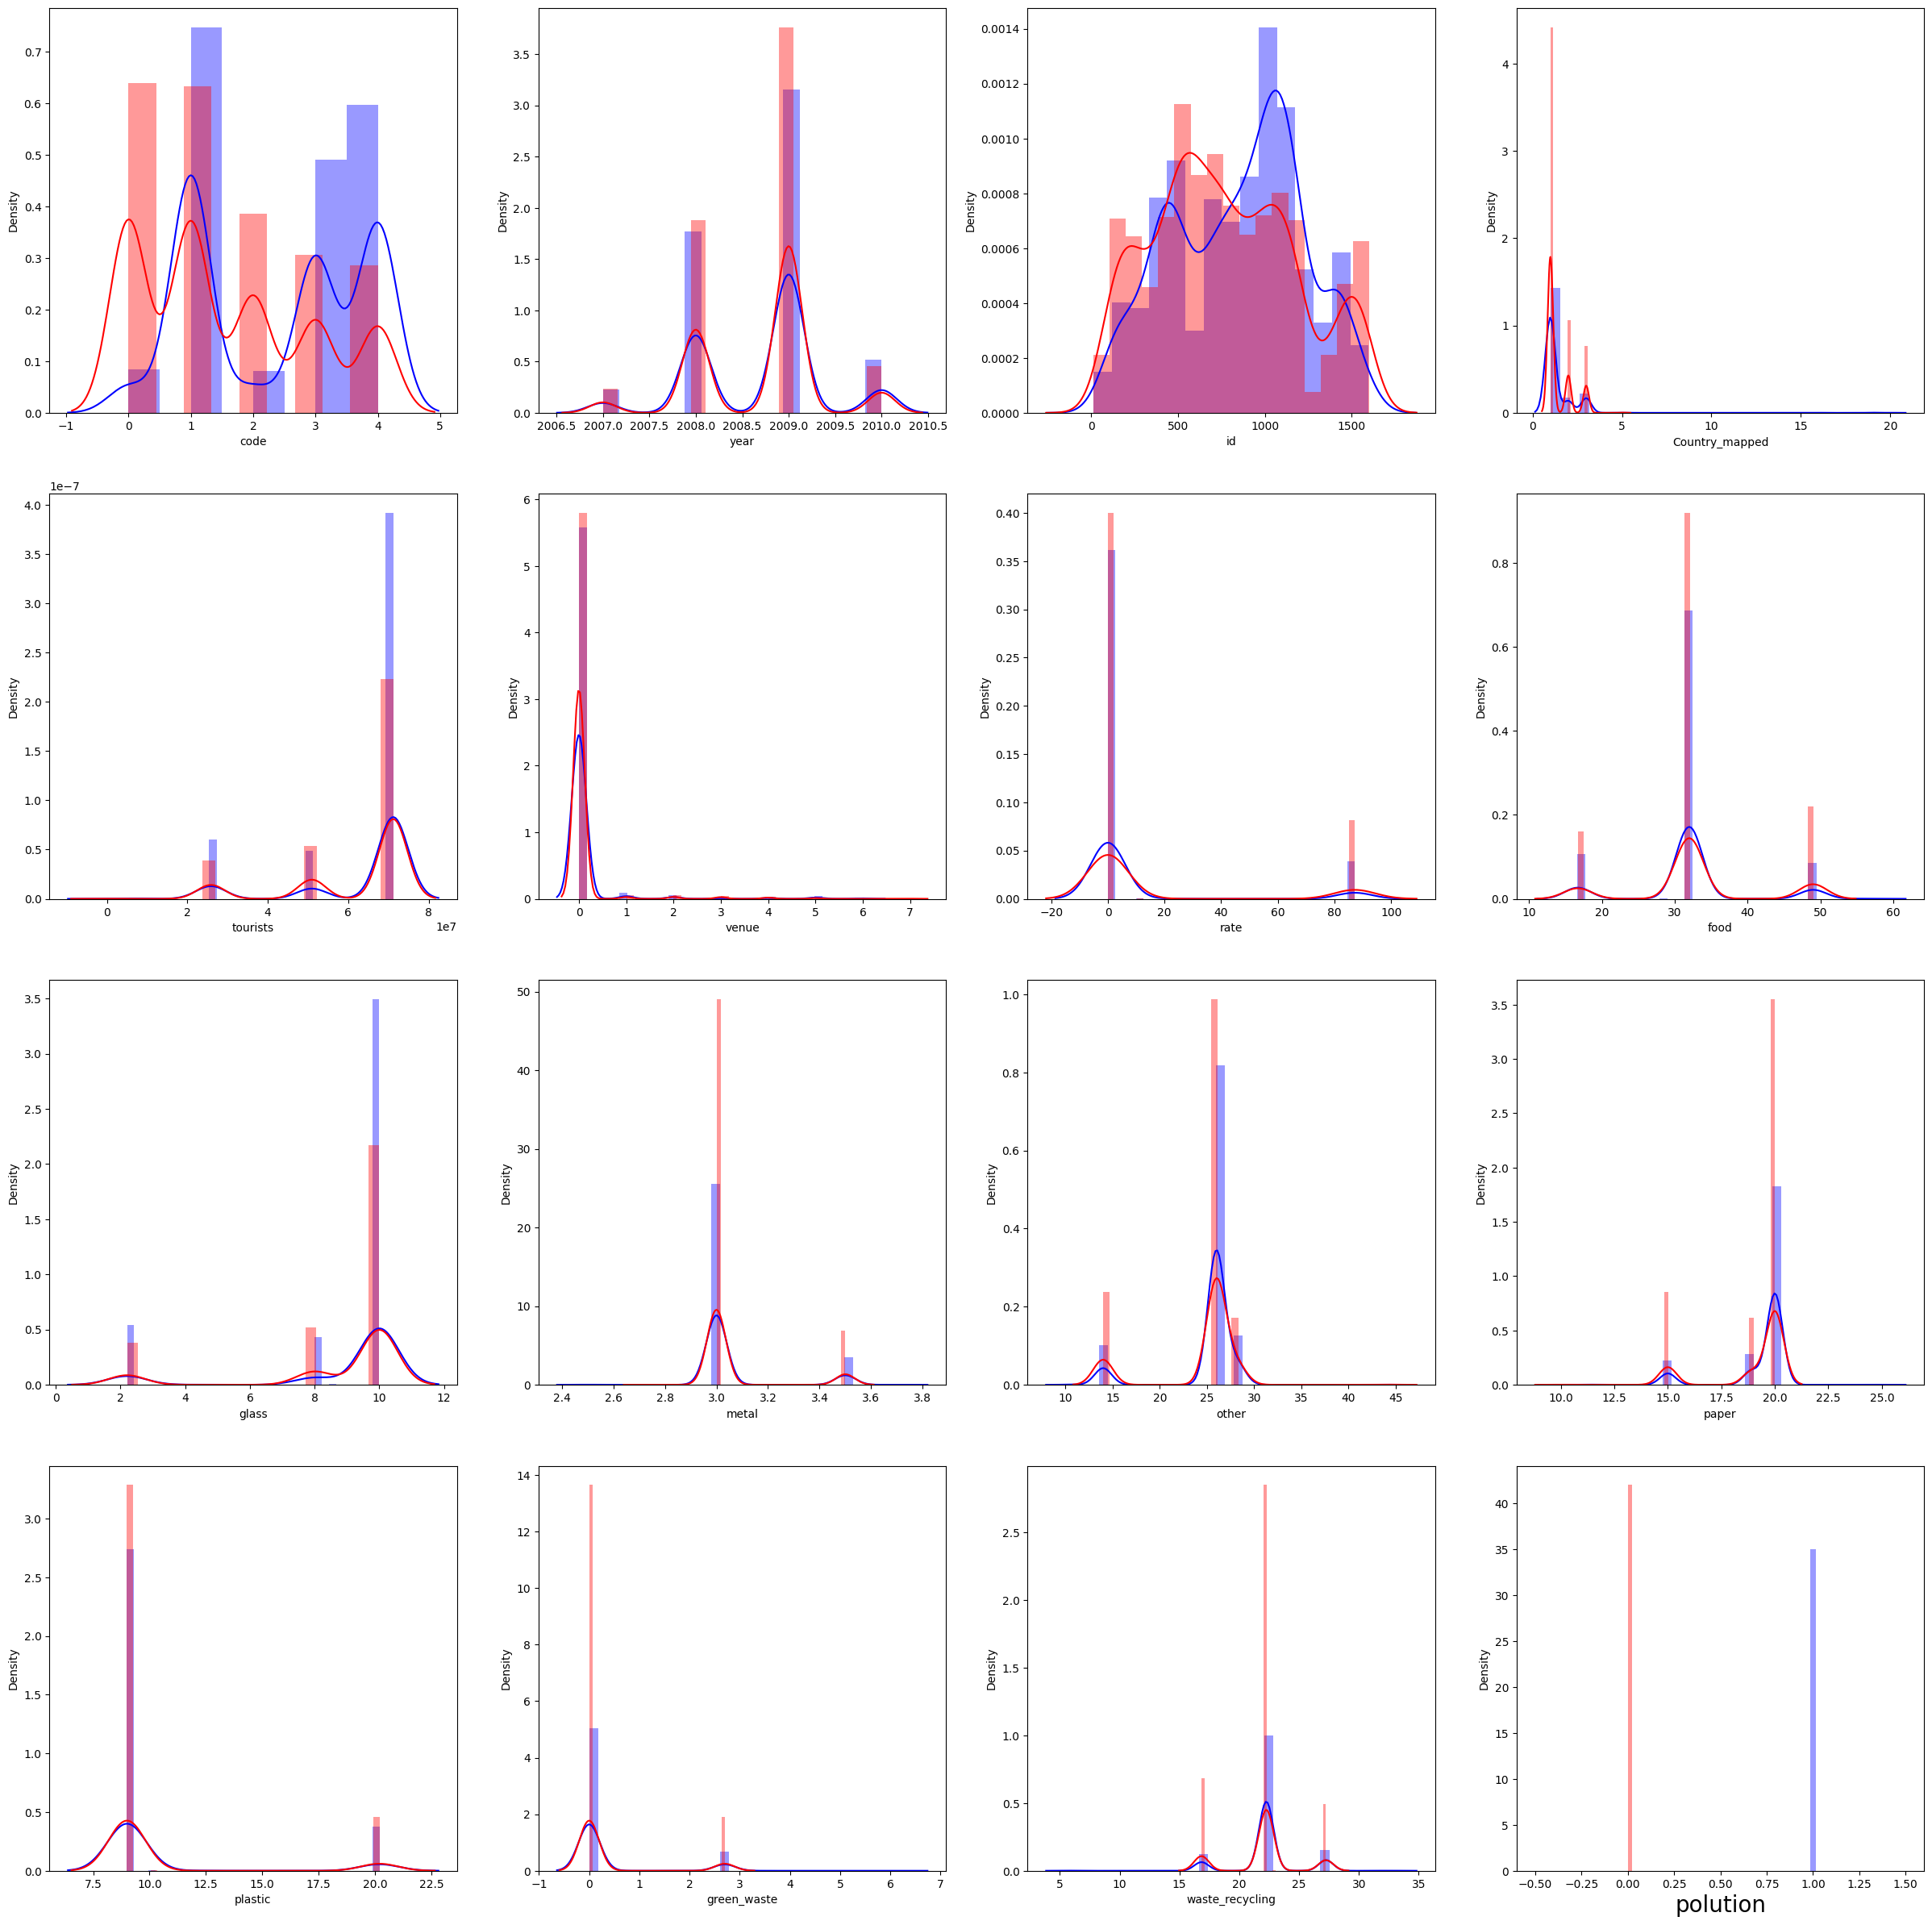

In [143]:
pd.set_option('use_inf_as_na', True)
corr_polution = list(set(df.columns))
poluted = df.loc[df["polution"] == 1]
not_poluted = df.loc[df["polution"] == 0]
features = corr_polution

color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(4,4, figsize=(30,30))
k = 0
columns = list(df.columns)
for i in range(4):
    for j in range(4):
        sns.distplot(poluted[columns[k]], ax = ax1[i][j], color = 'blue', label = 'poluted')
        sns.distplot(not_poluted[columns[k]], ax = ax1[i][j], color = 'red', label = 'not poluted')
        plt.xlabel(columns[k],size=20)
        k += 1
plt.show()

### b - Normalization

In [144]:
#want to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('polution',axis=1))
scaled_features = scaler.transform(df.drop('polution',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head(5).style.background_gradient(cmap='Blues')

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling
0,0.079756,0.448165,0.295009,-0.438273,0.542517,-0.171524,-0.403937,-0.064076,0.485878,-0.367174,0.319546,0.482373,-0.373774,-0.371824,0.056764
1,0.784112,0.448165,-0.715826,-0.438273,0.542517,4.910087,-0.403937,-0.064076,0.485878,-0.367174,0.319546,0.482373,-0.373774,-0.371824,0.056764
2,-1.328958,0.448165,-0.723426,-0.438273,0.542517,4.910087,-0.403937,-0.064076,0.485878,-0.367174,0.319546,0.482373,-0.373774,-0.371824,0.056764
3,0.784112,0.448165,-0.723426,-0.438273,0.542517,4.910087,-0.403937,-0.064076,0.485878,-0.367174,0.319546,0.482373,-0.373774,-0.371824,0.056764
4,0.079756,0.448165,0.257007,-0.438273,0.542517,-0.171524,-0.403937,-0.064076,0.485878,-0.367174,0.319546,0.482373,-0.373774,-0.371824,0.056764


### b - Heatmap

<Axes: >

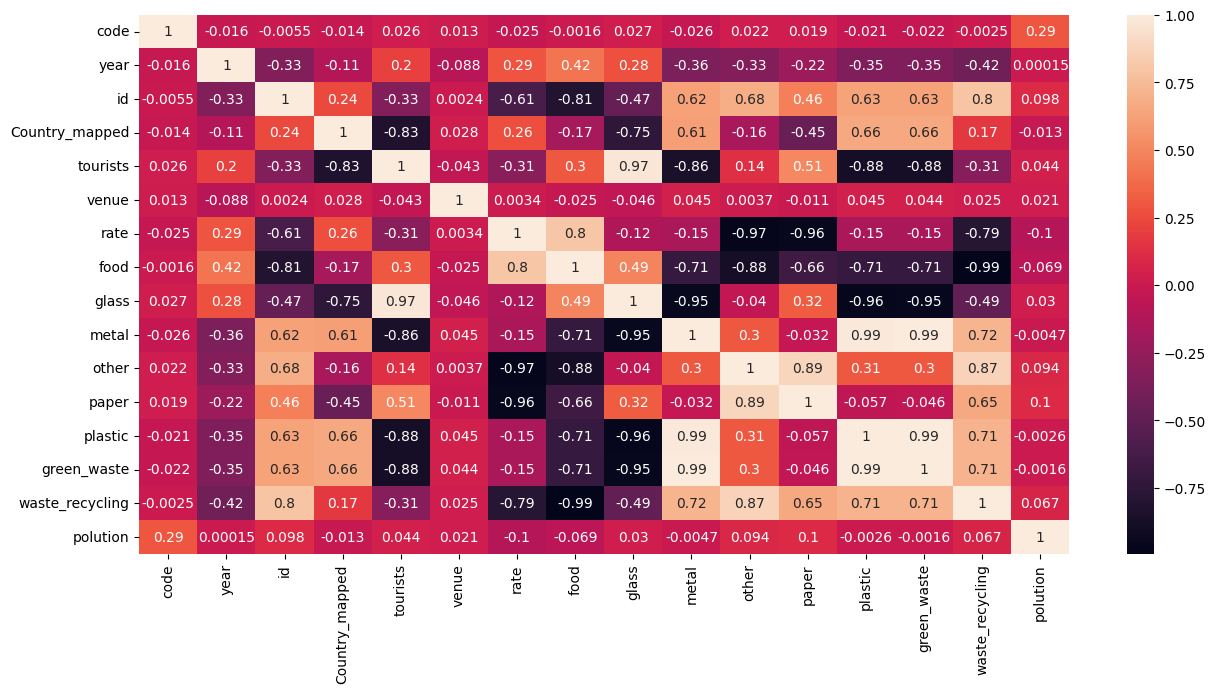

In [145]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True)

### b - Delete the columns with high correlation

<Axes: >

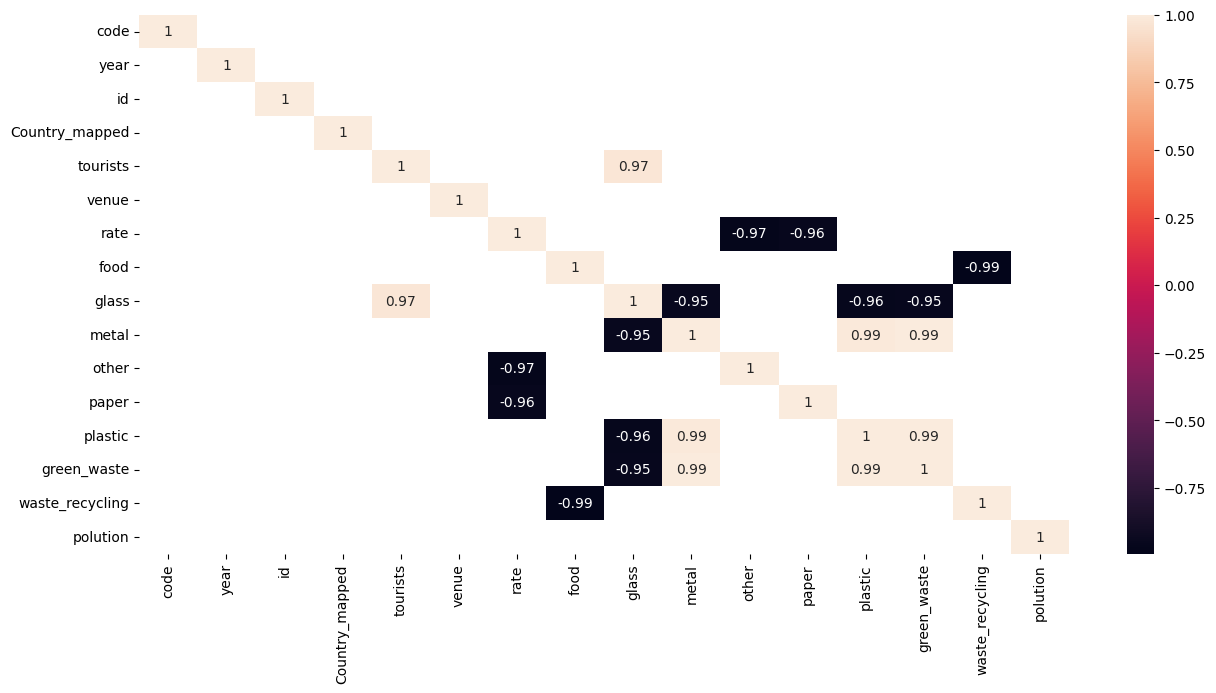

In [146]:
correlation_matrix = df.corr()
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.9]
plt.figure(figsize=(15, 7))
sns.heatmap(strong_correlations, annot=True)


In [147]:
#glass and tourists are highly correlated
#glass and metal are highly correlated
#glass and plastic are highly correlated
#glass and green_waste are highly correlated

#rate and other are highly correlated
#rate and paper are highly correlated

#food and waste_recycling are highly correlated

#metal and green_waste are highly correlated
#metal and waste_recycling are highly correlated

#plastic and green_waste are highly correlated

#we can drop glass, rate, waste_recycling, metal, 
df_feat = df_feat.drop(columns=['glass', 'rate', 'waste_recycling', 'metal','green_waste'])
df = df.drop(columns=['glass', 'rate', 'waste_recycling', 'metal','green_waste'])

### e - Standardisation

## VI - Modeling

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [149]:
#after normalization and dropping the columns

X=df_feat
y=df['polution']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [152]:
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y_train)
ytst=label_encoder.fit_transform(y_test)

Random Forest

In [153]:
#init time for model 1
import time
start_time = time.time()

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()

#parameters for the random forest model
param_grid = {
    'n_estimators': [i for i in range(1, 100)], 
    'criterion': ['gini', 'entropy', 'mse', 'mae']
}

#grid search for the random forest model
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_encoded)

#best parameters for the random forest model
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_parameters)
print("Best Score: ", best_score)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


Best Parameters:  {'criterion': 'entropy', 'n_estimators': 5}
Best Score:  0.7030728335991494


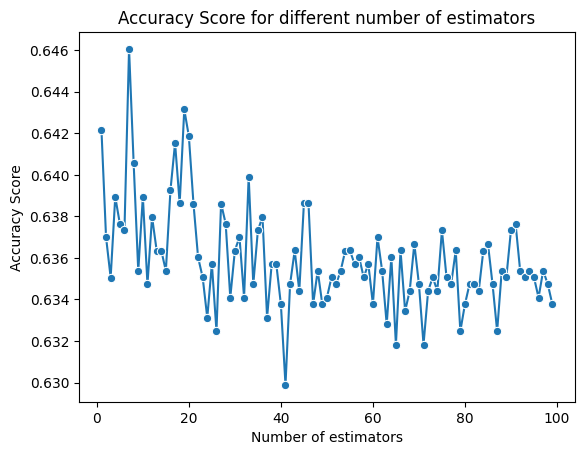

In [155]:
#plot the best n_estimators in fonction of the accuracy
n_estimators = [i for i in range(1, 100)]
scores = []
scaler = StandardScaler()
X=scaler.fit_transform(X)

for k in n_estimators:
    rf = RandomForestClassifier(criterion=best_parameters['criterion'], n_estimators=k)
    score = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
    scores.append(np.mean(score))

sns.lineplot(x=n_estimators, y=scores, marker = 'o')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for different number of estimators")
plt.show()

In [156]:
#compute the model with the best parameters
best_model = RandomForestClassifier(criterion=best_parameters['criterion'], n_estimators=best_parameters['n_estimators'])
best_model.fit(X_train, y_encoded)
y_pred = best_model.predict(X_test)

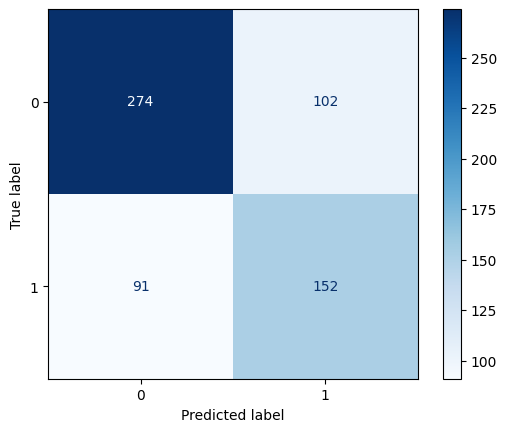

In [157]:
#plot the confusion matrix
cm = confusion_matrix(ytst, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()


In [158]:
#print the metrics
print("Mean Squared Error:", mean_squared_error(ytst, y_pred))
print("Precision:", precision_score(ytst, y_pred))
print("Recall:", recall_score(ytst, y_pred))
print("F1 Score:", f1_score(ytst, y_pred))
print("Accuracy:", accuracy_score(ytst, y_pred))

#end time for model 1
print("--- %s seconds ---" % (time.time() - start_time))

Mean Squared Error: 0.31179321486268174
Precision: 0.5984251968503937
Recall: 0.6255144032921811
F1 Score: 0.6116700201207244
Accuracy: 0.6882067851373183
--- 114.34984278678894 seconds ---


In [159]:
#create a dictionary to store the metrics
randomforest={'mean_squared_error':[],'precision':[],'recall':[],'f1_score':[],'accuracy':[]}
randomforest['mean_squared_error'].append(mean_squared_error(ytst, y_pred))
randomforest['precision'].append(precision_score(ytst, y_pred))
randomforest['recall'].append(recall_score(ytst, y_pred))
randomforest['f1_score'].append(f1_score(ytst, y_pred))
randomforest['accuracy'].append(accuracy_score(ytst, y_pred))

KNN

In [160]:
#init time for model 2
start_time2 = time.time()

In [161]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()

#parameters for the knn model
param_grid = {
    'n_neighbors': [i for i in range(1, 50)], 
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [i for i in range(1, 50)]
}

#grid search for the knn model
grid_search = GridSearchCV(estimator=KN, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_encoded)

#best parameters for the knn model
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_parameters)




Fitting 5 folds for each of 19208 candidates, totalling 96040 fits


Best Parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 45, 'weights': 'distance'}


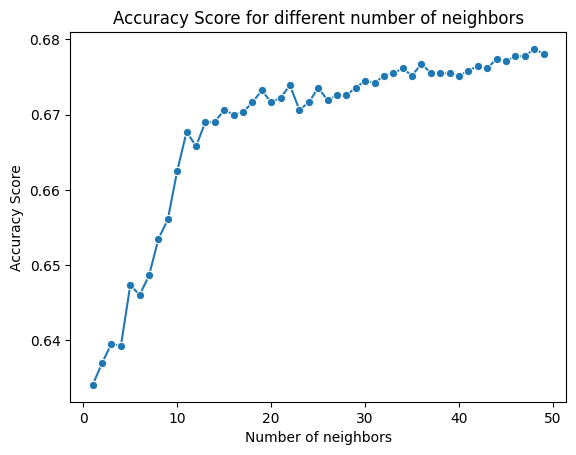

In [162]:
#plot the best n_neighbors in fonction of the accuracy
n_neighbors = [i for i in range(1, 50)]
scores = []
scaler = StandardScaler()
X=scaler.fit_transform(X)

for k in n_neighbors:
    knn = KNeighborsClassifier(algorithm=best_parameters['algorithm'],
                            leaf_size=best_parameters['leaf_size'],
                            n_neighbors=k,
                            weights=best_parameters['weights'])
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    scores.append(np.mean(score))

sns.lineplot(x=n_neighbors, y=scores, marker = 'o')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for different number of neighbors")
plt.show()

In [163]:
#compute the model with the best parameters
best_model = KNeighborsClassifier(algorithm=best_parameters['algorithm'],
                            leaf_size=best_parameters['leaf_size'],
                            n_neighbors=best_parameters['n_neighbors'],
                            weights=best_parameters['weights'])
best_model.fit(X_train, y_encoded)
y_pred = best_model.predict(X_test)

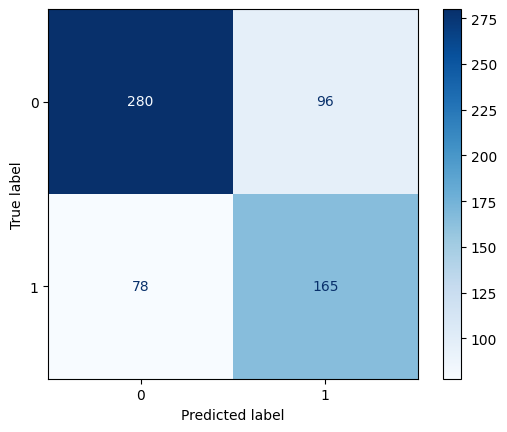

In [164]:
#plot the confusion matrix
cm = confusion_matrix(ytst, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

In [165]:
#print the metrics
print("Mean Squared Error:", mean_squared_error(ytst, y_pred))
print("Precision:", precision_score(ytst, y_pred))
print("Recall:", recall_score(ytst, y_pred))
print("F1 Score:", f1_score(ytst, y_pred))
print("Accuracy:", accuracy_score(ytst, y_pred))

#end time for model 2
print("--- %s seconds ---" % (time.time() - start_time2))

Mean Squared Error: 0.28109854604200324
Precision: 0.632183908045977
Recall: 0.6790123456790124
F1 Score: 0.6547619047619048
Accuracy: 0.7189014539579968
--- 267.4266686439514 seconds ---


In [166]:
#create a dictionary to store the metrics
knn={'mean_squared_error':[],'precision':[],'recall':[],'f1_score':[],'accuracy':[]}
knn['mean_squared_error'].append(mean_squared_error(ytst, y_pred))
knn['precision'].append(precision_score(ytst, y_pred))
knn['recall'].append(recall_score(ytst, y_pred))
knn['f1_score'].append(f1_score(ytst, y_pred))
knn['accuracy'].append(accuracy_score(ytst, y_pred))

logistic regression

In [167]:
#init time for model 3
start_time3 = time.time()

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
LR=LogisticRegression()

#parameters for the logistic regression model
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1],
    'C': [i for i in range(1, 50)],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

#grid search for the logistic regression model
grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_encoded)

#best parameters for the logistic regression model
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_parameters)

Fitting 5 folds for each of 9800 candidates, totalling 49000 fits
Best Parameters:  {'C': 27, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga', 'tol': 1}


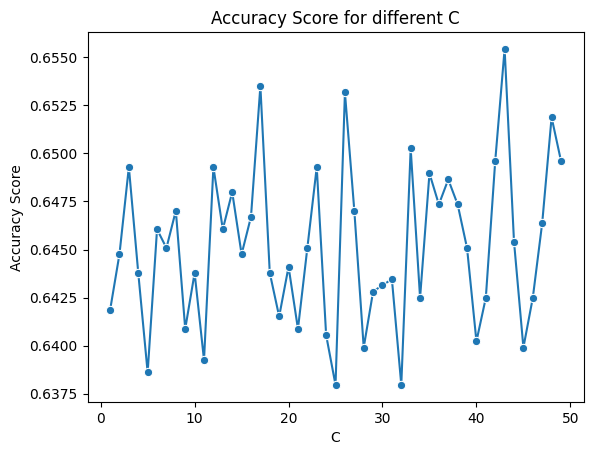

In [169]:
#plot the best C in fonction of the accuracy
C = [i for i in range(1, 50)]
scores = []
scaler = StandardScaler()
X=scaler.fit_transform(X)

for k in C:
    lr = LogisticRegression(C=k,
                            fit_intercept=best_parameters['fit_intercept'],
                            penalty=best_parameters['penalty'],
                            solver=best_parameters['solver'],
                            tol=best_parameters['tol'])
    score = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
    scores.append(np.mean(score))

sns.lineplot(x=C, y=scores, marker = 'o')
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for different C")
plt.show()

In [170]:
#compute the model with the best parameters
best_model = LogisticRegression(C=best_parameters['C'],
                            fit_intercept=best_parameters['fit_intercept'],
                            penalty=best_parameters['penalty'],
                            solver=best_parameters['solver'],
                            tol=best_parameters['tol'])
best_model.fit(X_train, y_encoded)
y_pred = best_model.predict(X_test)

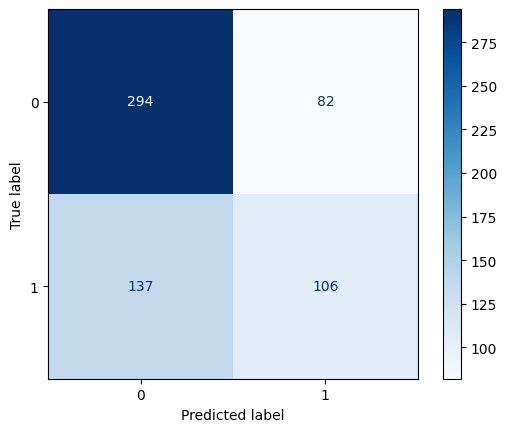

In [171]:
#plot the confusion matrix
cm = confusion_matrix(ytst, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

In [172]:
#print the metrics
print("Mean Squared Error:", mean_squared_error(ytst, y_pred))
print("Precision:", precision_score(ytst, y_pred))
print("Recall:", recall_score(ytst, y_pred))
print("F1 Score:", f1_score(ytst, y_pred))
print("Accuracy:", accuracy_score(ytst, y_pred))

#end time for model 3
print("--- %s seconds ---" % (time.time() - start_time3))

Mean Squared Error: 0.35379644588045234
Precision: 0.5638297872340425
Recall: 0.43621399176954734
F1 Score: 0.4918793503480279
Accuracy: 0.6462035541195477
--- 63.90382957458496 seconds ---


In [173]:
#create a dictionary to store the metrics
logisticregression={'mean_squared_error':[],'precision':[],'recall':[],'f1_score':[],'accuracy':[]}
logisticregression['mean_squared_error'].append(mean_squared_error(ytst, y_pred))
logisticregression['precision'].append(precision_score(ytst, y_pred))
logisticregression['recall'].append(recall_score(ytst, y_pred))
logisticregression['f1_score'].append(f1_score(ytst, y_pred))
logisticregression['accuracy'].append(accuracy_score(ytst, y_pred))

Gaussian NB

In [174]:
#init time for model 5
start_time5 = time.time()

In [175]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
NB=GaussianNB()

#parameters for the naive bayes model
param_grid = {
    'var_smoothing': [i for i in range(1, 100)],
}

#grid search for the naive bayes model
grid_search = GridSearchCV(estimator=NB, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2) 
grid_search.fit(X_train, y_encoded)

#best parameters for the naive bayes model
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_parameters)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


Best Parameters:  {'var_smoothing': 1}


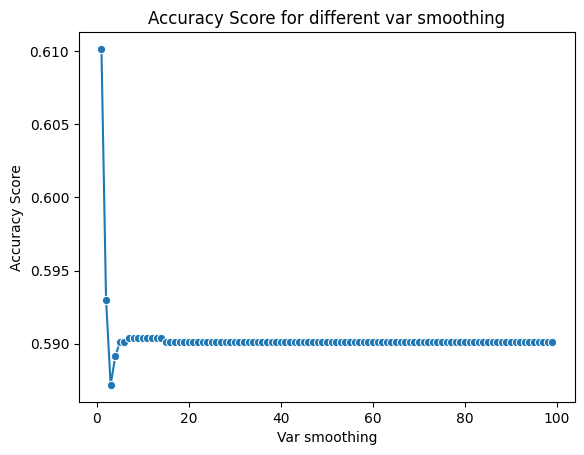

In [176]:
#plot the best var_smoothing in fonction of the accuracy
var_smoothing = [i for i in range(1, 100)]
scores = []
scaler = StandardScaler()
X=scaler.fit_transform(X)

for k in var_smoothing:
    nb = GaussianNB(var_smoothing=k)
    score = cross_val_score(nb, X, y, cv=5, scoring='accuracy')
    scores.append(np.mean(score))

sns.lineplot(x=var_smoothing, y=scores, marker = 'o')
plt.xlabel("Var smoothing")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for different var smoothing")
plt.show()

In [177]:
#compute the model with the best parameters
best_model = GaussianNB(var_smoothing=best_parameters['var_smoothing'])
best_model.fit(X_train, y_encoded)
y_pred = best_model.predict(X_test)

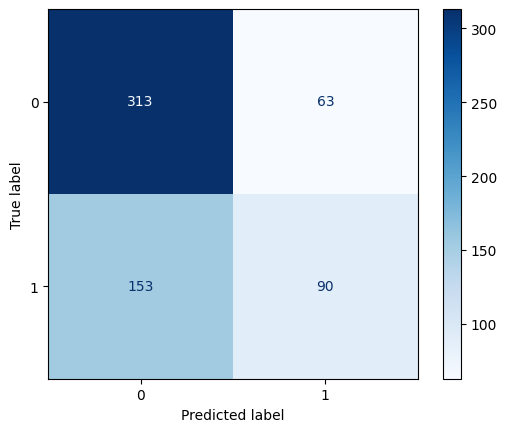

In [178]:
#plot the confusion matrix
cm = confusion_matrix(ytst, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

In [179]:
#print the metrics
print("Mean Squared Error:", mean_squared_error(ytst, y_pred))
print("Precision:", precision_score(ytst, y_pred))
print("Recall:", recall_score(ytst, y_pred))
print("F1 Score:", f1_score(ytst, y_pred))
print("Accuracy:", accuracy_score(ytst, y_pred))

#end time for model 5
print("--- %s seconds ---" % (time.time() - start_time5))

Mean Squared Error: 0.34894991922455576
Precision: 0.5882352941176471
Recall: 0.37037037037037035
F1 Score: 0.45454545454545453
Accuracy: 0.6510500807754442
--- 1.6035230159759521 seconds ---


In [180]:
#create a dictionary to store the metrics
naivebayes={'mean_squared_error':[],'precision':[],'recall':[],'f1_score':[],'accuracy':[]}
naivebayes['mean_squared_error'].append(mean_squared_error(ytst, y_pred))
naivebayes['precision'].append(precision_score(ytst, y_pred))
naivebayes['recall'].append(recall_score(ytst, y_pred))
naivebayes['f1_score'].append(f1_score(ytst, y_pred))
naivebayes['accuracy'].append(accuracy_score(ytst, y_pred))

In [187]:
#on ajoute une couleur a chaque model pour les differencier dans les plot
randomforest['color']=['red']
knn['color']=['blue']
logisticregression['color']=['green']
naivebayes['color']=['orange']


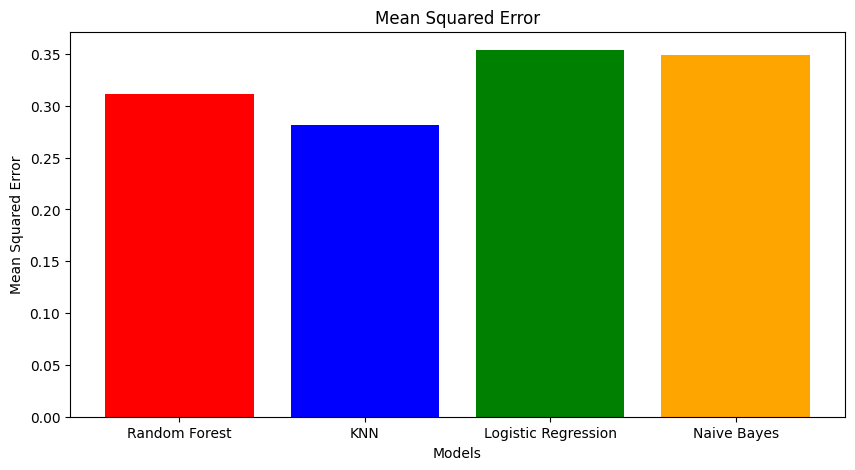

In [191]:
#plot bar chart for the metrics to compare the models


#plot the bar chart
plt.figure(figsize=(10,5))
plt.bar('Random Forest',randomforest['mean_squared_error'][0],color='red')
plt.bar('KNN',knn['mean_squared_error'][0],color='blue')
plt.bar('Logistic Regression',logisticregression['mean_squared_error'][0],color='green')
plt.bar('Naive Bayes',naivebayes['mean_squared_error'][0],color='orange')
plt.title('Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

         

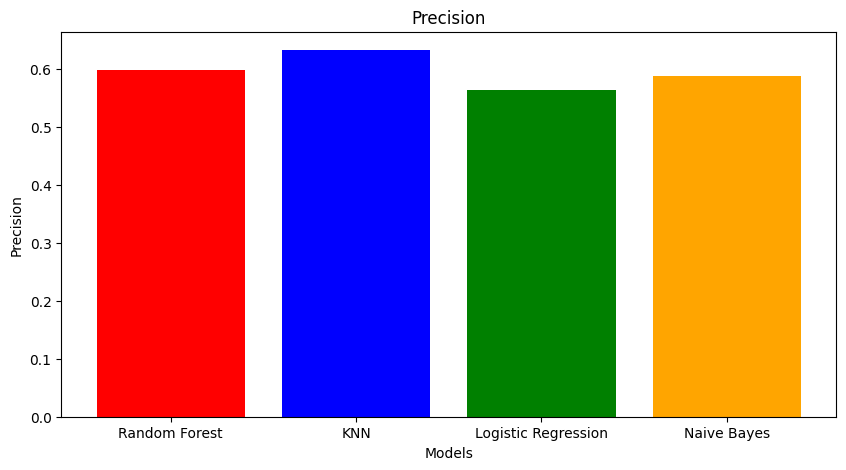

In [192]:
#plot the bar chart
plt.figure(figsize=(10,5))
plt.bar('Random Forest',randomforest['precision'][0],color='red')
plt.bar('KNN',knn['precision'][0],color='blue')
plt.bar('Logistic Regression',logisticregression['precision'][0],color='green')
plt.bar('Naive Bayes',naivebayes['precision'][0],color='orange')
plt.title('Precision')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.show()


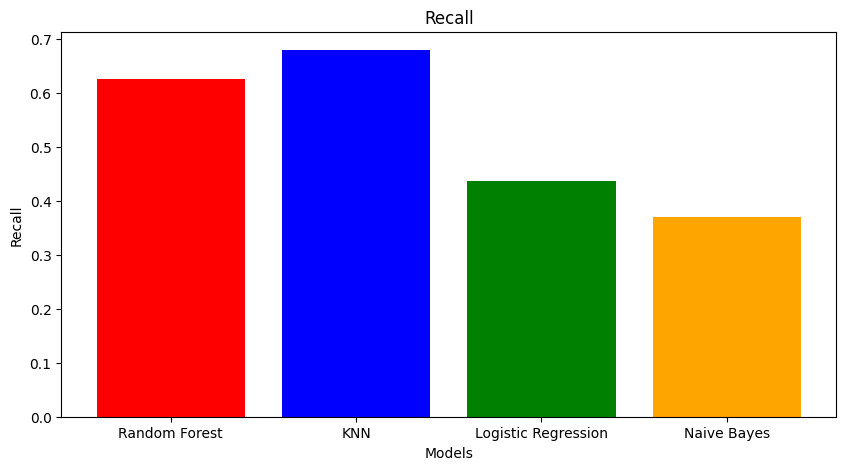

In [193]:
#plot the bar chart
plt.figure(figsize=(10,5))
plt.bar('Random Forest',randomforest['recall'][0],color='red')
plt.bar('KNN',knn['recall'][0],color='blue')
plt.bar('Logistic Regression',logisticregression['recall'][0],color='green')
plt.bar('Naive Bayes',naivebayes['recall'][0],color='orange')
plt.title('Recall')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()


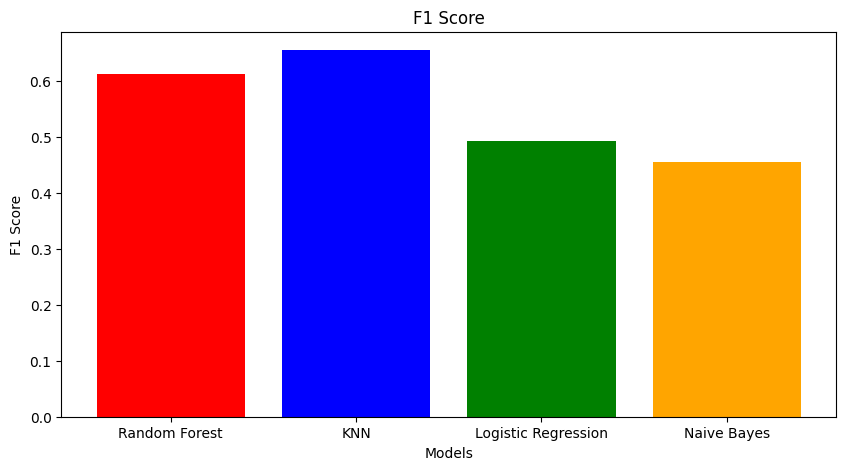

In [194]:
#plot the bar chart
plt.figure(figsize=(10,5))
plt.bar('Random Forest',randomforest['f1_score'][0],color='red')
plt.bar('KNN',knn['f1_score'][0],color='blue')
plt.bar('Logistic Regression',logisticregression['f1_score'][0],color='green')
plt.bar('Naive Bayes',naivebayes['f1_score'][0],color='orange')
plt.title('F1 Score')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()


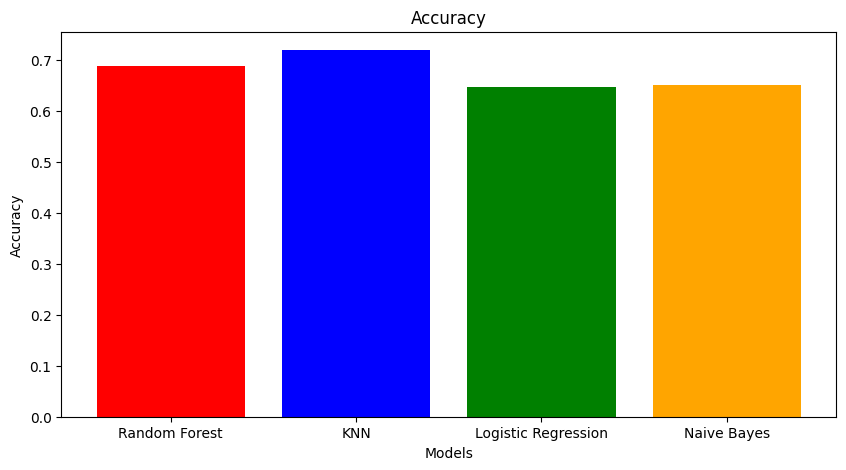

In [195]:
#plot the bar chart
plt.figure(figsize=(10,5))
plt.bar('Random Forest',randomforest['accuracy'][0],color='red')
plt.bar('KNN',knn['accuracy'][0],color='blue')
plt.bar('Logistic Regression',logisticregression['accuracy'][0],color='green')
plt.bar('Naive Bayes',naivebayes['accuracy'][0],color='orange')
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()
